# Arboles de Clasificación

Teoría y Práctica 4

# Teoría

In [ ]:
import numpy as np
from sklearn import tree
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\nacho\Documents\Facultad\Mineria de Datos\Datos\AlSol.csv')

In [ ]:
df

In [9]:
X = df.drop(columns=['id', 'Quemado'])
Y = df['Quemado']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convertir variables categóricas a numéricas
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [17]:
X

,Nombre_1,Nombre_2,Nombre_3,Nombre_4,Nombre_5,Nombre_6,Nombre_7,Pelo_1,Pelo_2,Estatura_1,Estatura_2,Peso_1,Peso_2,Protector_1
0,False,False,False,False,False,False,True,False,True,False,True,False,False,False
1,False,False,True,False,False,False,False,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,True,True,False,False,True,False
4,False,False,False,True,False,False,False,True,False,False,True,True,False,False
5,False,False,False,False,False,True,False,False,False,False,False,True,False,False
6,False,False,False,False,True,False,False,False,False,False,True,True,False,False
7,False,True,False,False,False,False,False,False,True,True,False,False,False,True


In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf = clf.fit(X, Y)

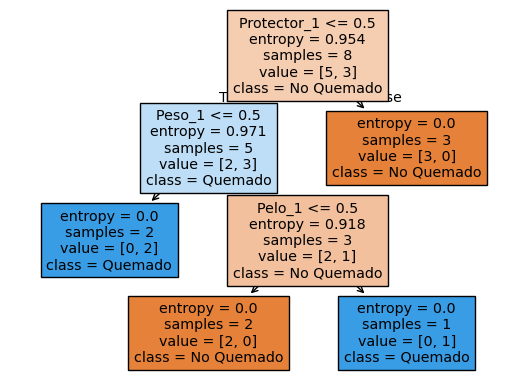

<Figure size 1200x800 with 0 Axes>

In [20]:
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Quemado', 'Quemado'])
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.show()

### Golf numerico

In [21]:
df2 = pd.read_csv(r'C:\Users\nacho\Documents\Facultad\Mineria de Datos\Datos\Golf_Numerico.csv')

In [ ]:
df2

In [22]:
X = df2.drop(columns=['Juega'])
Y = df2['Juega']
# Convertir variables categóricas a numéricas

label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [46]:
from sklearn.model_selection import cross_val_score


clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
cross_val_score(clf, X, Y, cv=5).mean()
clf = clf.fit(X, Y)

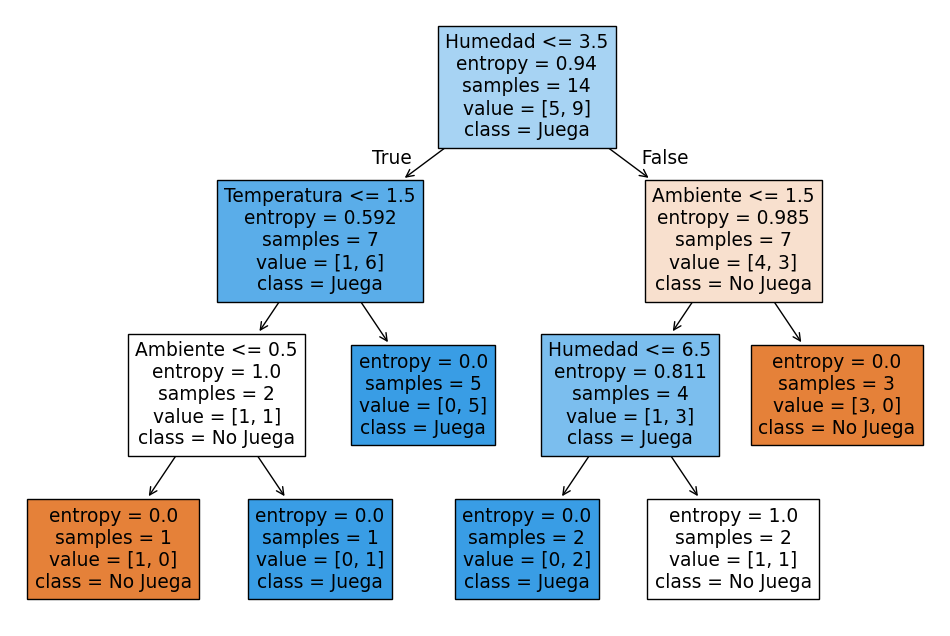

In [47]:
# Plotear el árbol de decisión
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Juega', 'Juega'])
plt.show()

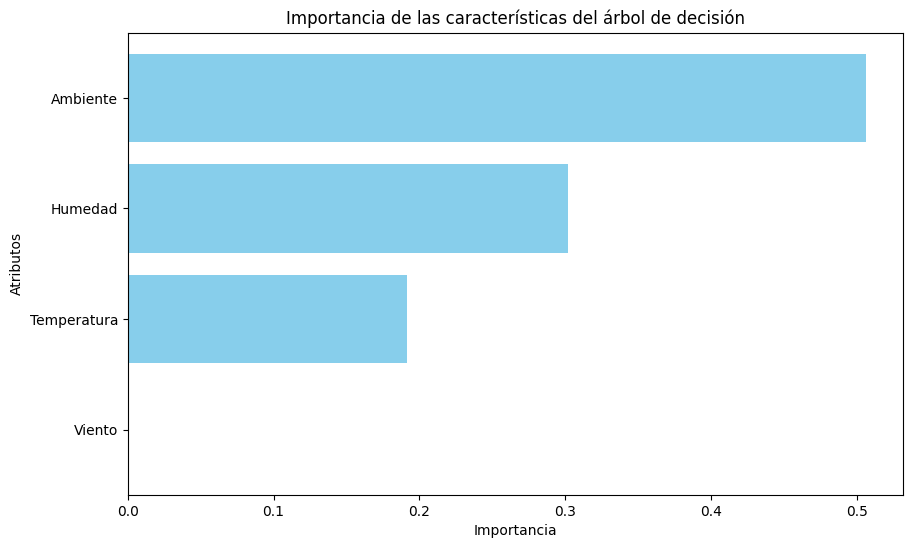

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características y ordenarlas
feature_importances = clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Atributos')
plt.title('Importancia de las características del árbol de decisión')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar de mayor a menor
plt.show()

In [43]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['No Juega', 'Juega'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
#tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Juega', 'Juega'])

#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("iris") 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Golf numerico

In [48]:
df3 = pd.read_csv(r'C:\Users\nacho\Documents\Facultad\Mineria de Datos\Datos\Golf_Numerico.csv')

In [50]:
df3

,Ambiente,Temperatura,Humedad,Viento,Juega
0,soleado,85,85,NO,No
1,soleado,80,90,SI,No
2,nublado,83,86,NO,Si
3,lluvioso,70,96,NO,Si
4,lluvioso,68,80,NO,Si
5,lluvioso,65,70,SI,No
6,nublado,64,65,SI,Si
7,soleado,72,95,NO,No
8,soleado,69,70,NO,Si
9,lluvioso,75,80,NO,Si


In [54]:
X = df3.drop(columns=['Juega'])
Y = df3['Juega']

# Convertir variables categóricas a numéricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [55]:
X

,Ambiente,Temperatura,Humedad,Viento
0,2,85,85,0
1,2,80,90,1
2,1,83,86,0
3,0,70,96,0
4,0,68,80,0
5,0,65,70,1
6,1,64,65,1
7,2,72,95,0
8,2,69,70,0
9,0,75,80,0


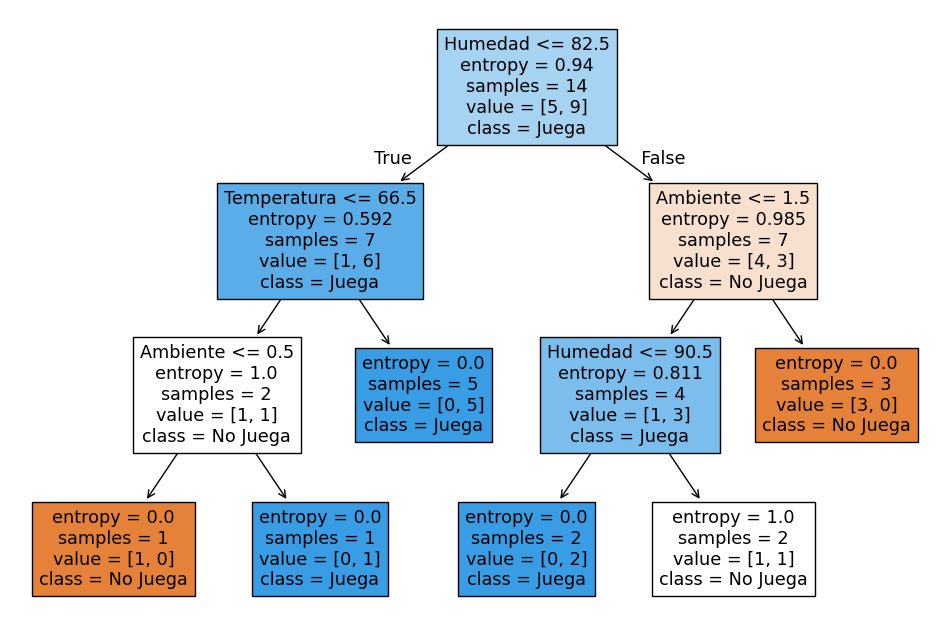

In [56]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf = clf.fit(X, Y)
    
# Plotear el árbol de decisión
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Juega', 'Juega'])
plt.show()

In [57]:
# Score del modelo de arbol de clasificacion
clf.score(X, Y)

0.9285714285714286

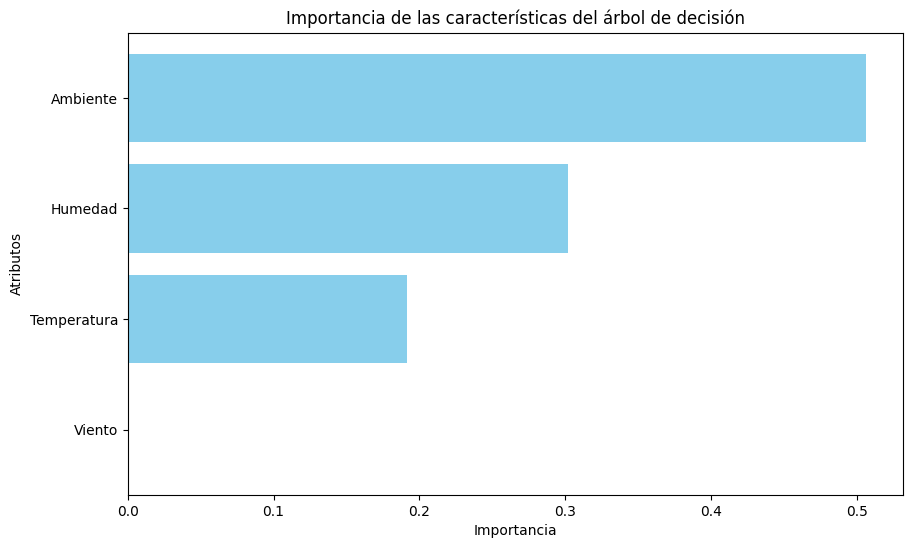

In [58]:
# Grafico de la importancia de los atributos
feature_importances = clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Atributos')
plt.title('Importancia de las características del árbol de decisión')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar de mayor a menor
plt.show()